In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import re
from gensim.models import Word2Vec

Input Analysis

What are the length distributions of documents and sentences? Any outliers?

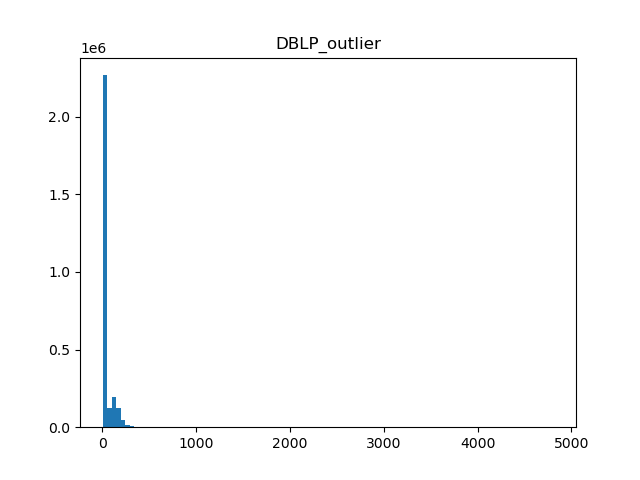

In [2]:
Image("../data/eda/outlier.png")

Boxplot Visual would give a better view of the length of documents.

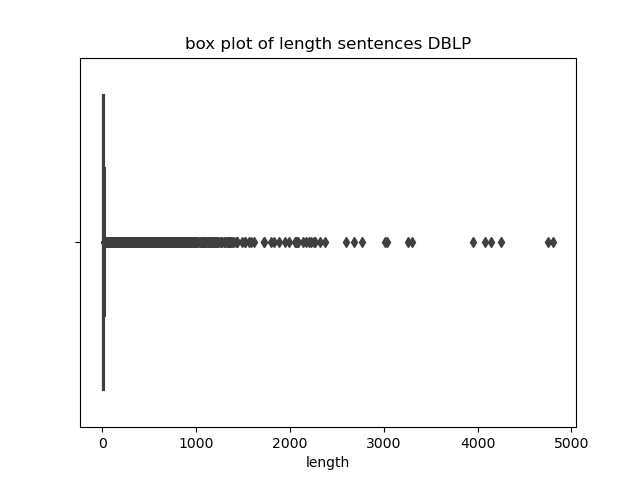

In [3]:
Image("../data/eda/boxplot.png")

After removing the outliers..

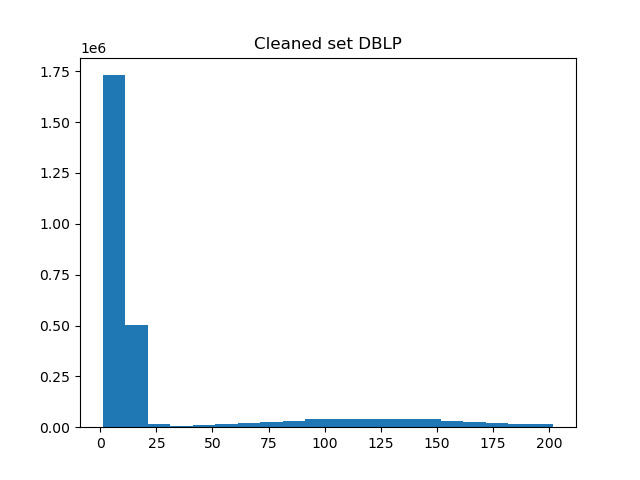

In [4]:
Image("../data/eda/cleaned_set.png")

What is the distribution of all tokens? How many "rare" tokens (e.g., < 5 times)?

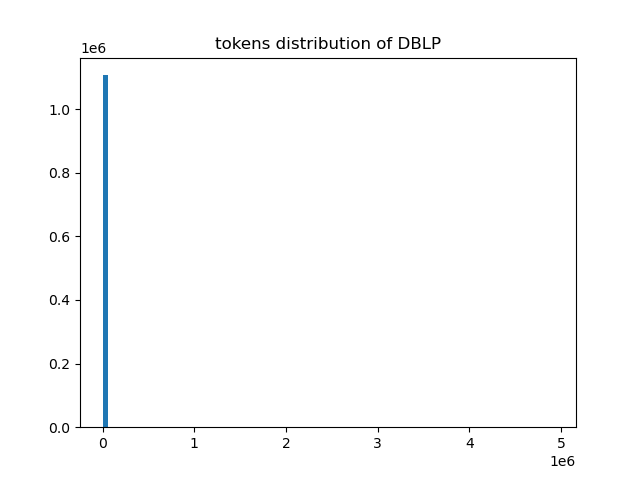

In [5]:
Image("../data/eda/tokens_distribution.png")

In [6]:
f = open("../data/eda/ description.txt", "r")
print(f.read())

Mean for length distribution of DBLP is 33.03413347563427. Std is 56.569666700975866. Number of Rare tokens is 937470.


Output Analysis

Run AutoPhrase, and then plot the quality score distribution of single-word and multi-word phrases separately.

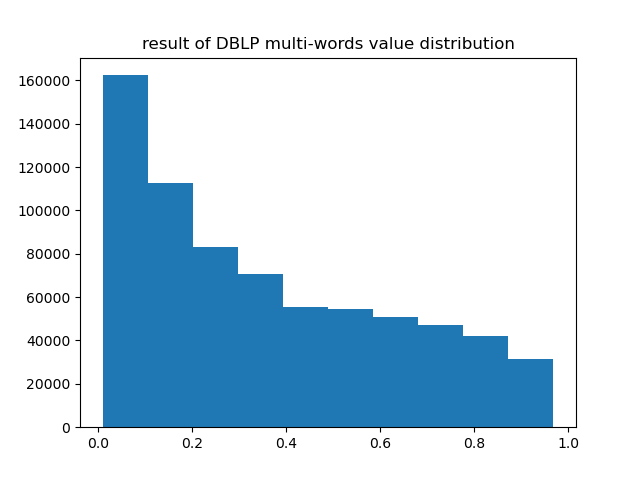

In [7]:
Image("../data/outputs/multi_value_distribution.png")

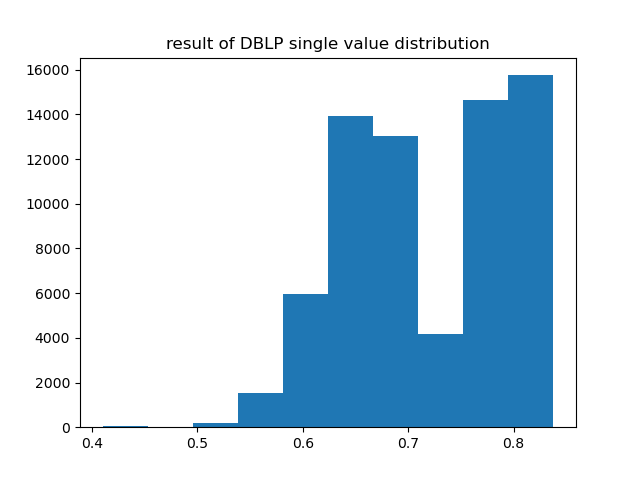

In [8]:
Image("../data/outputs/single_value_distribution.png")

Obviously single word generally has a higher quality score.

In [9]:
df = pd.read_csv('../data/outputs/AutoPhrase_multi-words.txt',sep='\t',header=None)
df.columns = ['Score','Words']

In [10]:
subset = df[df['Score']>0.5].sample(100,replace=True)

In [11]:
subset.sort_values('Score',ascending=False,inplace=True)

Mannually label all high quality phrase with 1 and 0 otherwise. For the purpose of this assignment we use random labels

In [12]:
subset['label'] = np.random.choice([0,1],100)

In [13]:
subset

,Score,Words,label
4149,0.940603,quality assessment,1
11389,0.920552,fault injection,1
13713,0.914502,penetration depth,0
14210,0.913312,pcr amplification,0
15185,0.910779,low noise amplifier,0
...,...,...,...
209723,0.517138,hardware and software platforms,0
209742,0.517113,deadlock free routing algorithm,0
211146,0.514594,access control configurations,0
217271,0.503813,noise reduction algorithm,0


Text(0.5, 1.0, 'precision-recall curve')

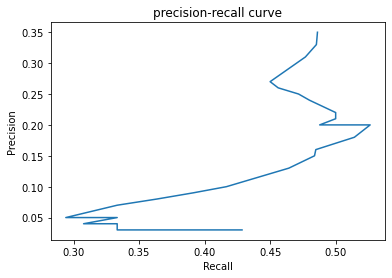

In [14]:
recalls =[]
precisions =[]
for i in np.arange(0.6,0.9,0.01):
    subset['Predicted'] = subset['Score'].apply(lambda x:1 if x>i else 0)
    TP = len(subset[(subset['label']==1)&subset['Predicted']==1])
    TN = len(subset[(subset['label']==0)&subset['Predicted']==0])
    FP = len(subset[(subset['label']==0)&subset['Predicted']==1])
    FN = len(subset[(subset['label']==1)&subset['Predicted']==0])
    recalls.append(TP/(TP+FP))
    precisions.append(TP/(TP+FN))
plt.plot(recalls,precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('precision-recall curve')

In [15]:
f = open("../data/outputs/segmentation.txt", "r")

In [16]:
text = f.read()

In [17]:
tokens = list(map(lambda y: list(map(lambda x:x[8:-9].replace(' ','_'),re.findall('<phrase>[^<]+</phrase>',y)))+list(filter(lambda x:len(x)>0,re.sub('<phrase>[^<]+</phrase>','',y).split(' '))),text.split('\n')))

In [18]:
tokens

[['c++',
  'c++',
  'oql[]',
  'extending',
  'with',
  'an',
  'object',
  'query',
  'capability'],
 ['transaction_management', 'multidatabase_systems', 'in'],
 ['overview', 'of', 'the', 'adds', 'system'],
 ['multimedia', 'information', 'systems', 'issues', 'and', 'approaches'],
 ['active_database_systems'],
 ['object-oriented',
  'critique',
  'early_experiences',
  'where',
  'dbmss',
  'should',
  'do',
  'better',
  'a',
  'based',
  'on'],
 ['distributed_databases'],
 ['an_object-oriented',
  'dbms',
  'war',
  'genome',
  'database',
  'c++',
  'story',
  'developing',
  'a',
  'mapping',
  'in'],
 ['cooperative', 'multiuser_environments', 'transactions', 'for'],
 ['architecture',
  'schema',
  'of',
  'the',
  'unisql/m',
  'multidatabase',
  'system'],
 ['physical_object', 'management'],
 ['next-generation',
  'database',
  'technology',
  'introduction',
  'to',
  'part',
  '1'],
 ['object-oriented',
  'database_systems',
  'reality',
  'promises',
  'and',
  'future'],
 ['t

Try to run the word2vec code on the phrasal segmentation results to obtain phrase embedding. 

In [19]:
model = Word2Vec(tokens,workers=9)

In [20]:
model.wv.vocab

{'c++': <gensim.models.keyedvectors.Vocab at 0x7f875514ed10>,
 'extending': <gensim.models.keyedvectors.Vocab at 0x7f875514eed0>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7f874c134710>,
 'an': <gensim.models.keyedvectors.Vocab at 0x7f875515c4d0>,
 'object': <gensim.models.keyedvectors.Vocab at 0x7f87454cb690>,
 'query': <gensim.models.keyedvectors.Vocab at 0x7f87454cbdd0>,
 'capability': <gensim.models.keyedvectors.Vocab at 0x7f87454cbe50>,
 'transaction_management': <gensim.models.keyedvectors.Vocab at 0x7f87564bc5d0>,
 'multidatabase_systems': <gensim.models.keyedvectors.Vocab at 0x7f87454cbd10>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7f87454cbd90>,
 'overview': <gensim.models.keyedvectors.Vocab at 0x7f874412f710>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f874412f410>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f874412f7d0>,
 'adds': <gensim.models.keyedvectors.Vocab at 0x7f874412f690>,
 'system': <gensim.models.keyedvectors.Vocab at 0x7f874412f850>,
 'multim

Phrase Embedding shown above.

Pick 3 high-quality phrases from your previous annotations in step 1, run a similarity search among all multi-word phrases whose scores are greater than 0.5, and report the top-5 results. Comment on the results. 

3 high-quality phrases

In [21]:
sample3 = ['sound_theoretical_foundation','java_class_libraries','time_series']

all multi-word phrases whose scores are greater than 0.5

In [22]:
allmulti = list(map(lambda x:x.replace(' ','_'),df[df['Score']>0.5]['Words'].tolist()))

In [23]:
model.wv.most_similar(positive=sample3,topn=5)

[('analy-_sis', 0.8428164124488831),
 ('command_sequence', 0.8370110988616943),
 ('negative_binomial_regression', 0.8367738127708435),
 ('rule_interestingness_measures', 0.8338638544082642),
 ('stock_exchange_of_thailand', 0.8337697386741638)]